In [30]:
import tweepy
from matplotlib import pyplot as plt
import seaborn as sns
import requests
from time import sleep, strftime
import random
from random import randint
from bs4 import BeautifulSoup
from selenium import webdriver
import shutil
import pickle
import os
import pandas as pd

#twitter account to analize
target=''
consumer_key = ""
consumer_secret = "" 
access_token  = ""
access_token_secret = ""
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [31]:
ihack = api.get_user(target)
tuits=tweepy.Cursor(api.user_timeline, ihack.id).items()
tuitsihack= [[tuit.text,tuit.created_at,tuit.id, tuit.retweet_count,tuit.favorite_count] for tuit in tuits]
print("*********************** TWEETS A ANALIZAR:")
print(len(tuitsihack))

*********************** TWEETS A ANALIZAR:
3176


In [32]:
dfihack= pd.DataFrame(tuitsihack, columns=["tweet", "date", "id", "rt", "fav"])
print("********************** DATOS OBTENIDOS")
print(dfihack.head(3))

********************** DATOS OBTENIDOS
                                               tweet                date  \
0  Hoy conocemos a los ganadores del concurso con... 2021-02-25 16:52:00   
1  Te animo a participar en el concurso! Si tiene... 2020-11-30 17:21:47   
2  No os perdáis el vídeo del proyecto en colabor... 2020-11-30 17:21:47   

                    id  rt  fav  
0  1364981481668550660   2   48  
1  1333461234960756738   2   32  
2  1333461233564082177   2   48  


In [19]:
semana = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}
dfihack['year']=dfihack.date.apply(lambda x: x.year)
dfihack['month']=dfihack.date.apply(lambda x: x.month)
dfihack['weekday']=dfihack.date.apply(lambda x: semana[x.weekday()])
dfihack['hour']=dfihack.date.apply(lambda x: x.hour)

In [20]:
tags=[]
def getTags(text):
    for t in text.split():
        if(t.startswith('#')):
            tags.append(t)

dfihack.tweet.apply(getTags)
settags=set(tags)
len(settags)
len(tags)

1900

In [21]:
tagcounter={}

for settag in settags:
    tagcounter[settag]=int(tags.count(settag))
dftc=pd.DataFrame.from_dict(tagcounter, orient="index")
print("********************** 20 HASHTAGS MÁS UTILIZADOS")
print(dftc.sort_values(0, ascending=False).head(20))

********************** HASHTAGS MÁS UTILIZADOS


{'#JUGONES': 138,
 '#LaLigaSantander!💥': 1,
 '#ChiringuitoMessi': 102,
 '#Chiringuitoramos': 1,
 '#ElChiringuitoDeMega💥💥': 1,
 '#ChiringuitoMbappé?': 1,
 '#COVID19.': 2,
 '#ChiringuitoOnFire!🔥': 2,
 '#EUR…': 1,
 '#Euro2020.': 1,
 '#ChiringuitoHazard': 1,
 '#SportPlus!➡️…': 1,
 '#JUGONE…': 1,
 '#TikTok': 1,
 '#ChiringuitoBarcelona': 5,
 '#ElChiringuitoConLaSelección': 26,
 '#ESP.': 4,
 '#Uruguay': 1,
 '#ENG!': 1,
 '#SUI': 26,
 '#Sp…': 1,
 '#BritishGP!': 1,
 '#Villarreal': 1,
 '#SportPlus!…': 1,
 '#LaLigaSantander?…': 1,
 '#Argentina': 1,
 '#ChiringuitoOnFire…': 1,
 '#FelizDomingo': 2,
 '#PETÓN:': 2,
 '#Ospina': 1,
 '#GPSilverstone': 1,
 '#ChiringuitoInside': 16,
 '#ChiringuitoInda': 11,
 '#EURO2020!': 4,
 '#ChiringuitoSelección!': 1,
 '#ChiringuitoRamos': 14,
 '#ChiringuitoInside.': 1,
 '#SUI-#ESP': 4,
 '#TDF2021!': 37,
 '#COVID19': 3,
 '#Messi': 1,
 '#ChiringuitoPogba': 4,
 '#Tokyo2020,': 1,
 '#ChiringuitoPolémica!': 1,
 '#ChiringuitoGriezmann': 8,
 '#SportPlus.…': 1,
 '#ElChiringuitoD

********************* TWEETS POR MES Y AÑO
2021


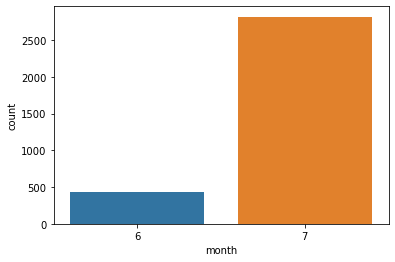

In [24]:
print("********************* TWEETS POR MES Y AÑO")          
for year in dfihack['year'].unique():
    print(year)
    sns.countplot(x=dfihack.loc[dfihack.year==year]['month'])
    plt.show()

******************** TWEETS POR DÍA Y MES
7


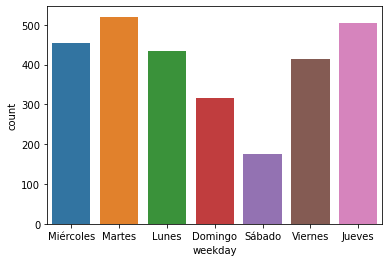

6


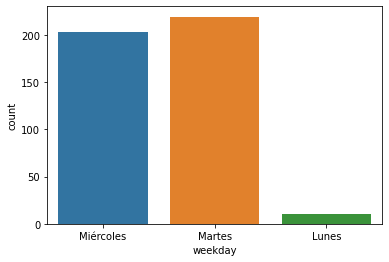

In [28]:
print("******************** TWEETS POR DÍA Y MES")
for month in dfihack['month'].unique():
    print(month)
    sns.countplot(x=dfihack.loc[dfihack.month==month]['weekday'])
    plt.show()

*******************  TWEETS POR HORA Y DÍA
Miércoles


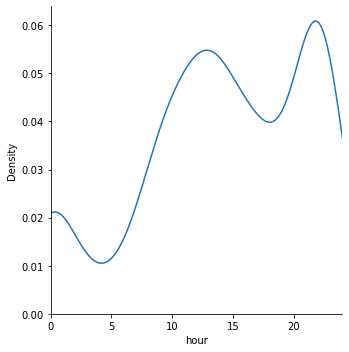

Martes


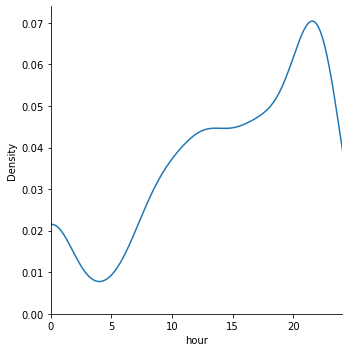

Lunes


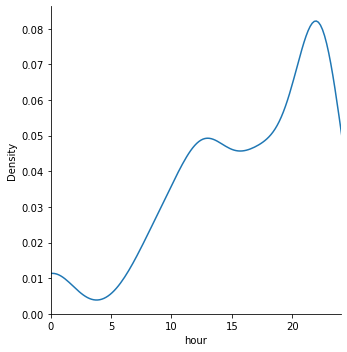

Domingo


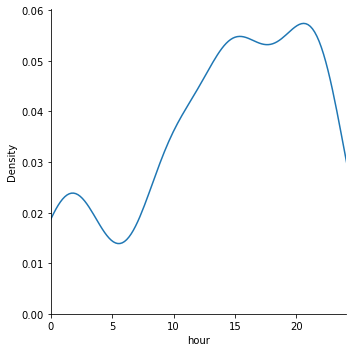

Sábado


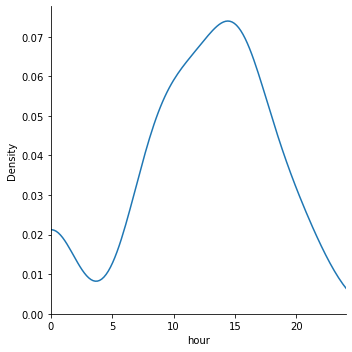

Viernes


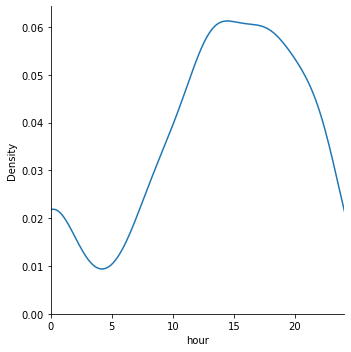

Jueves


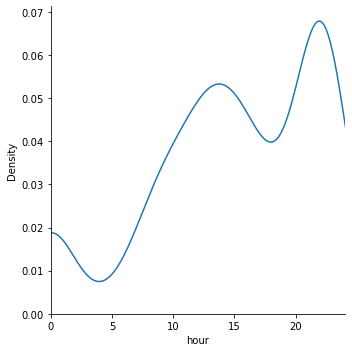

In [29]:
print("*******************  TWEETS POR HORA Y DÍA")
for weekday in dfihack['weekday'].unique():
    print(weekday)
    sns.displot(x=dfihack.loc[dfihack.weekday==weekday]['hour'], kind="kde")
    plt.xlim(0, 24)
    plt.show()

In [27]:
print("****************** PALABRAS MÁS DICHAS POR AÑO")
years=dfihack["year"].unique()
for year in years:
    allwords=[]
    def getTags(text):
        for t in text.split():
            #kitamos preoposiciones
            if(len(t)>4):
                allwords.append(t)

    dfihack[dfihack["year"]==year].tweet.apply(getTags)

    setwords=set(allwords)
    len(allwords) 
    wordcounter={}
    for setword in setwords:
        wordcounter[setword]=int(allwords.count(setword))
    dfwc=pd.DataFrame.from_dict(wordcounter, orient="index")
    print("*****************************"+str(year)+"****************************")
    print(dfwc.sort_values(0, ascending=False).head(10))

****************** PALABRAS MÁS DICHAS POR AÑO
*****************************2021****************************
                    0
MESSI             249
BARÇA             158
@jpedrerol        151
#EURO2020         143
#JUGONES          138
#SportPlus        132
MADRID            125
@elchiringuitotv  121
nuestro           113
vemos             113
